# Setup do projeto

In [62]:
import os
import urllib
from zipfile import ZipFile

import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

import sklearn

# Recuperação dos dados

In [63]:
BIKE_DATA_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/'
BIKE_DATA_URL = BIKE_DATA_ROOT+'Bike-Sharing-Dataset.zip'

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'Bike-Sharing-Dataset.zip'

BIKE_DATA = os.path.join(DATA_PATH, DATA_FILE)

In [64]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
    with ZipFile(local_path, 'r') as zipObj:
        zipObj.extractall(data_path)

download_data(BIKE_DATA_URL, DATA_PATH, DATA_FILE)

In [65]:
df_day = pd.read_csv(os.path.join(DATA_PATH, 'day.csv'))
df_day = df_day.drop(['instant'], axis=1) 
df_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Análise exploratória dos dados

In [66]:
	# - instant: record index
	# - dteday : date
	# - season : season (1:springer, 2:summer, 3:fall, 4:winter)
	# - yr : year (0: 2011, 1:2012)
	# - mnth : month ( 1 to 12)
	# - hr : hour (0 to 23)
	# - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	# - weekday : day of the week
	# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	# - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	# - hum: Normalized humidity. The values are divided to 100 (max)
	# - windspeed: Normalized wind speed. The values are divided to 67 (max)
	# - casual: count of casual users
	# - registered: count of registered users
	# - cnt: count of total rental bikes including both casual and registered
df_day.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [67]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'], format='%Y-%m-%d')
df_day = df_day.set_index('dteday')
df_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [68]:
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [69]:
#verificar dados nulos
df_day.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Relação entre as variáveis

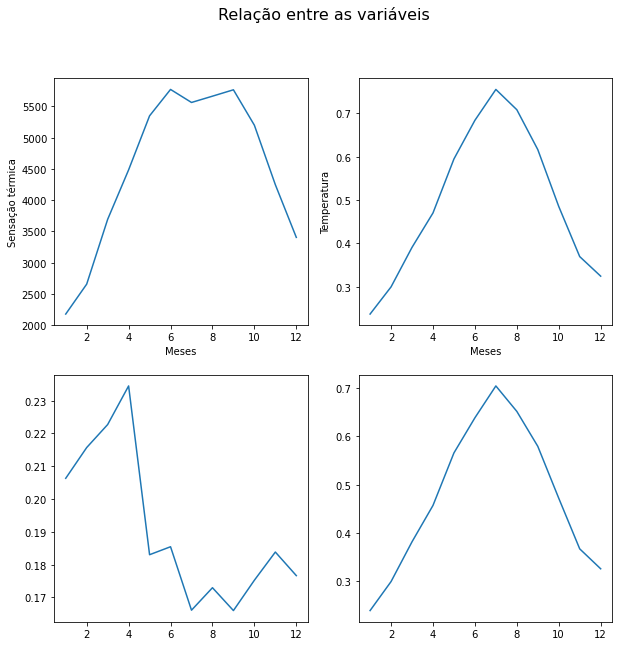

In [70]:
group_by_month = df_day.groupby(by=[df_day.index.month]).mean()

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Relação entre as variáveis', fontsize=16)

ax1.plot(group_by_month['mnth'], group_by_month['cnt'])
ax1.set_xlabel('Meses')
ax1.set_ylabel('Número de bicicletas')

ax2.plot(group_by_month['mnth'], group_by_month['temp'])
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')

ax3.plot(group_by_month['mnth'], group_by_month['windspeed'])
ax1.set_xlabel('Meses')
ax1.set_ylabel('Velocidade do vento')

ax4.plot(group_by_month['mnth'], group_by_month['atemp'])
ax1.set_xlabel('Meses')
ax1.set_ylabel('Sensação térmica')

plt.show()



# Treinamento

In [71]:
#Foram retiradas as colunas casual e registred. A coluna datetime foi usada com índice e tb não entra como dados.
X = df_day.iloc[:,:-3].values
y = df_day.iloc[:,-1].values


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
colunas = list(df_day.columns)
colunas = colunas[:-3]

importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

Variavel: temp       - Importancia: 0.3517331249633595
Variavel: yr         - Importancia: 0.2796572335827408
Variavel: atemp      - Importancia: 0.1555692497271627
Variavel: hum        - Importancia: 0.05934010015836526
Variavel: season     - Importancia: 0.052566180728747566
Variavel: windspeed  - Importancia: 0.03291238169175034
Variavel: mnth       - Importancia: 0.026553330152781135
Variavel: weathersit - Importancia: 0.01849433754183515
Variavel: weekday    - Importancia: 0.015779598041828338
Variavel: workingday - Importancia: 0.004389935459133304
Variavel: holiday    - Importancia: 0.0030045279522959052


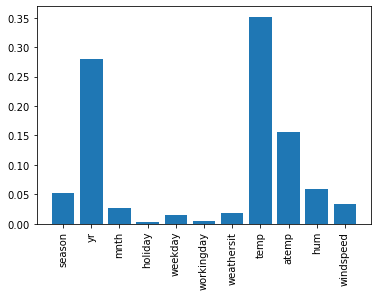

In [75]:
import matplotlib.pyplot as plt
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
_=plt.xticks(X_valores, colunas, rotation='vertical')


# Avaliação de outros modelos

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def build_regressors():
    regressors = []

    regressors.append(
        ('lr', 
        LinearRegression(),
        {'fit_intercept': [True, False]})
    )

    regressors.append(
        ('svr',
        SVR(),
        {'C': [0.1, 1, 10],
         'gamma': [0.00001, 0.0001, 0.001, 0.01, 1],
         'epsilon': [0.0001, 0.005, 0.001, 1, 5, 10]})
    )

    regressors.append(
        ('dt',
        DecisionTreeRegressor(),
        {'splitter': ['best', 'random']})
    ),

    regressors.append(
        ('rf',
        RandomForestRegressor(random_state=42),
        {'n_estimators': [100, 200, 500]}
        )
    )

    return regressors

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

regressors = build_regressors()
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

for name, regressor, params in regressors:
    print(f">>> regressor : {name}")
    # Treinamento
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring)
    gs.fit(X_train, y_train)
    cv_results = cross_val_score(gs, X_train, y_train, cv=kfold, scoring=scoring) # análise
    names.append(name)
    print("Best parameters: {}".format(gs.best_params_))
    print("CV results {}".format(cv_results))
    train_results.append(abs(cv_results))

    # Teste
    y_pred = gs.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print("RMSE: {}".format(rmse))
    test_results.append(rmse)

>>> regressor : lr
Best parameters: {'fit_intercept': True}
CV results [-904.3780026  -873.34650437 -922.69522364]
RMSE: 831.2851545662688
>>> regressor : svr
Best parameters: {'C': 10, 'epsilon': 0.0001, 'gamma': 0.01}
CV results [-1792.79873987 -1862.88359256 -1912.3144423 ]
RMSE: 1943.79667056855
>>> regressor : dt
Best parameters: {'splitter': 'random'}
CV results [-970.0243481  -927.04852582 -876.74872383]
RMSE: 1073.6909827928203
>>> regressor : rf
Best parameters: {'n_estimators': 500}
CV results [-784.14032995 -675.91709237 -670.83237988]
RMSE: 672.2790763658495


<ipython-input-78-bb1bdd81c44a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


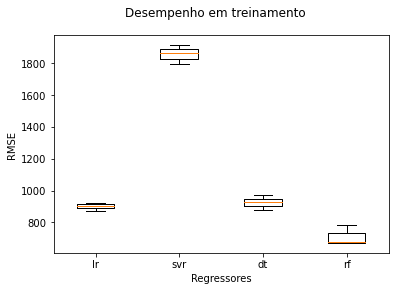

In [78]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em treinamento')
ax.set_xticklabels(names)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')
_ = plt.boxplot(train_results)

Text(0.5, 0, 'Regressores')

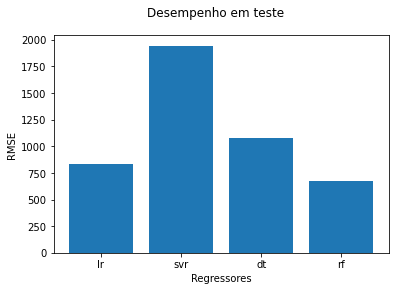

In [79]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em teste')
_ = plt.bar(names, test_results)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')

O regressor Random Forest foi o que apresentou menor RSME sendo o que teve resultados melhores.